In [1]:
from pureskillgg_datascience_showcase.notebook import setup_notebook

In [2]:
setup_notebook()

PURESKILLGG_TOME_DEFAULT_HEADER_NAME is header_tome
PURESKILLGG_TOME_DS_TYPE is csds
PURESKILLGG_TOME_COLLECTION_PATH is H:\\CSDS_tomes\\
PURESKILLGG_TOME_DS_COLLECTION_PATH is H:\\CSDS_daily\\


In [3]:
# %load ../usual_suspects.py
# pylint: disable=unused-import
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pureskillgg_dsdk.tome import TomeCuratorFs

pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)
pd.set_option("display.min_rows", 150)
# pd.set_option('display.float_format', '{:.4f}'.format)

curator = TomeCuratorFs()


In [4]:
try_again_red = "#cf6262"
button_green = "#53ac67"

In [5]:
df = curator.get_dataframe('channel_player_disconnect.2021-05-01,2022-01-01')

2022-06-25 13:21.35 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/channel_player_disconnect.2021-05-01,2022-01-01/tome prefix=None root_path=H:\\CSDS_tomes\\
2022-06-25 13:21.35 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channel_player_disconnect.2021-05-01,2022-01-01/tome page_number=0 prefix=None root_path=H:\\CSDS_tomes\\
2022-06-25 13:21.36 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channel_player_disconnect.2021-05-01,2022-01-01/tome page_number=1 prefix=None root_path=H:\\CSDS_tomes\\


In [6]:
total_dc=len(df)

In [7]:
print(total_dc)

424154


In [8]:
df['disconnect_reason'].value_counts()

Disconnect                                                                                                          313947
Kicked by Console                                                                                                    41314
The match has ended                                                                                                  27142
#GameUI_Disconnect_RemoteProblem_Timeout                                                                             11885
No user logon                                                                                                         7118
Kicked by Console : You have been voted off                                                                           5968
timed out                                                                                                             4745
Kicked by Console : Player idle                                                                                       4577
Kicked by Consol

### Wow that is a lot of PureServer stuff. Let's group them all.

In [9]:
def fix_disconnect_reason(dr):
    if "PureServer_Mismatch" in dr:
        return "Pure Server Mismatch"
    if "(check sending and receiving code for mismatches)" in dr:
        return "ProcessUsercmds:  Overflowed reading usercmd data"
    return dr

In [10]:
df['disconnect_reason']=df['disconnect_reason'].apply(fix_disconnect_reason)

In [11]:
df['disconnect_reason'].value_counts()

Disconnect                                                   313947
Kicked by Console                                             41314
The match has ended                                           27142
#GameUI_Disconnect_RemoteProblem_Timeout                      11885
No user logon                                                  7118
Kicked by Console : You have been voted off                    5968
timed out                                                      4745
Kicked by Console : Player idle                                4577
Kicked by Console : For doing too much team damage             3166
Kicked by Console : For killing a teammate at round start      1241
VAC authentication error                                        774
You were AFK for too long                                       730
Your SteamID is not allowed                                     308
You need to have the Anti-cheat client running to connect       267
#GameUI_Disconnect_TooManyCommands              

In [12]:
df_hdr=curator.get_loader('channel_player_disconnect.2021-05-01,2022-01-01').header.get_dataframe()

2022-06-25 13:21.36 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome\csds\channel_player_disconnect.2021-05-01,2022-01-01/header/tome prefix=None root_path=H:\\CSDS_tomes\\
2022-06-25 13:21.36 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome\csds\channel_player_disconnect.2021-05-01,2022-01-01/header/tome page_number=0 prefix=None root_path=H:\\CSDS_tomes\\


In [13]:
sum(df_hdr['platform']=="faceit")

6533

### 6k FACEIT matches

In [14]:
len(df_hdr)

61465

### 61k matches total in the dataset

In [15]:
total_matches = len(df_hdr)

<AxesSubplot:>

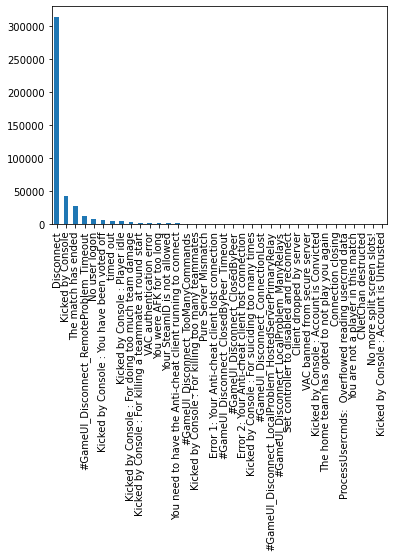

In [16]:
df['disconnect_reason'].value_counts().plot(kind='bar')

### Wow that plot sucks. maybe seaborn is better.

In [17]:
order=list(df['disconnect_reason'].value_counts().index)

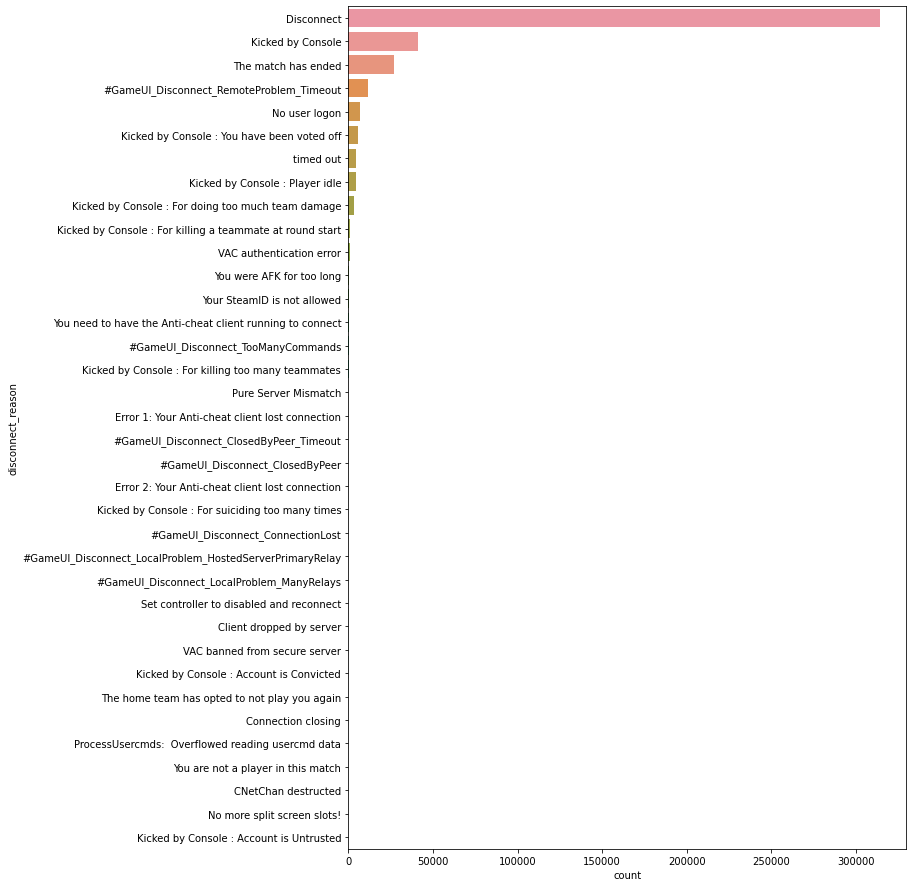

In [18]:
plt.rcParams["figure.figsize"] = (10,15.5)
ax = sns.countplot(y="disconnect_reason", data=df,order=order)

### NICE. Lets make it so we can see the small numbers by splitting the plots into 3.

In [19]:
def fix_disconnect_reason_other(dr):
    if dr in order[4:]:
        return "other"
    return dr
df['disconnect_reason_other']=df['disconnect_reason'].apply(fix_disconnect_reason_other)

In [20]:
if not os.path.isdir('tmp'):
    os.makedirs('tmp')

In [21]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': False})

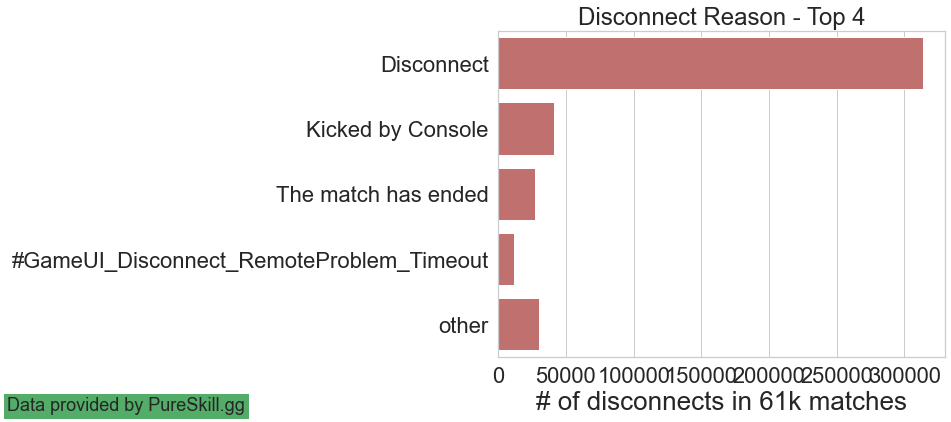

In [34]:
plt.rcParams["figure.figsize"] = (8,6)
sns.set(font_scale = 2)
sns.set_style('whitegrid')
ax = (
    sns.countplot(y="disconnect_reason_other", data=df,order=[*order[0:4],'other'], color=try_again_red)
)

ax.set_xlabel("# of disconnects in 61k matches", fontsize = 26)
ax.set_ylabel("", fontsize = 20)
ax.set(title='Disconnect Reason - Top 4')
ax.text(-1.1, -0.15, 'Data provided by PureSkill.gg', 
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes, fontsize = 18, bbox = dict(facecolor = button_green, alpha = 1))

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'black'})

## saving this way fails because 
## the figures are too wide for tight_layout or some nonsense...
fig = ax.get_figure()
fig.savefig("tmp/top_4.png") 

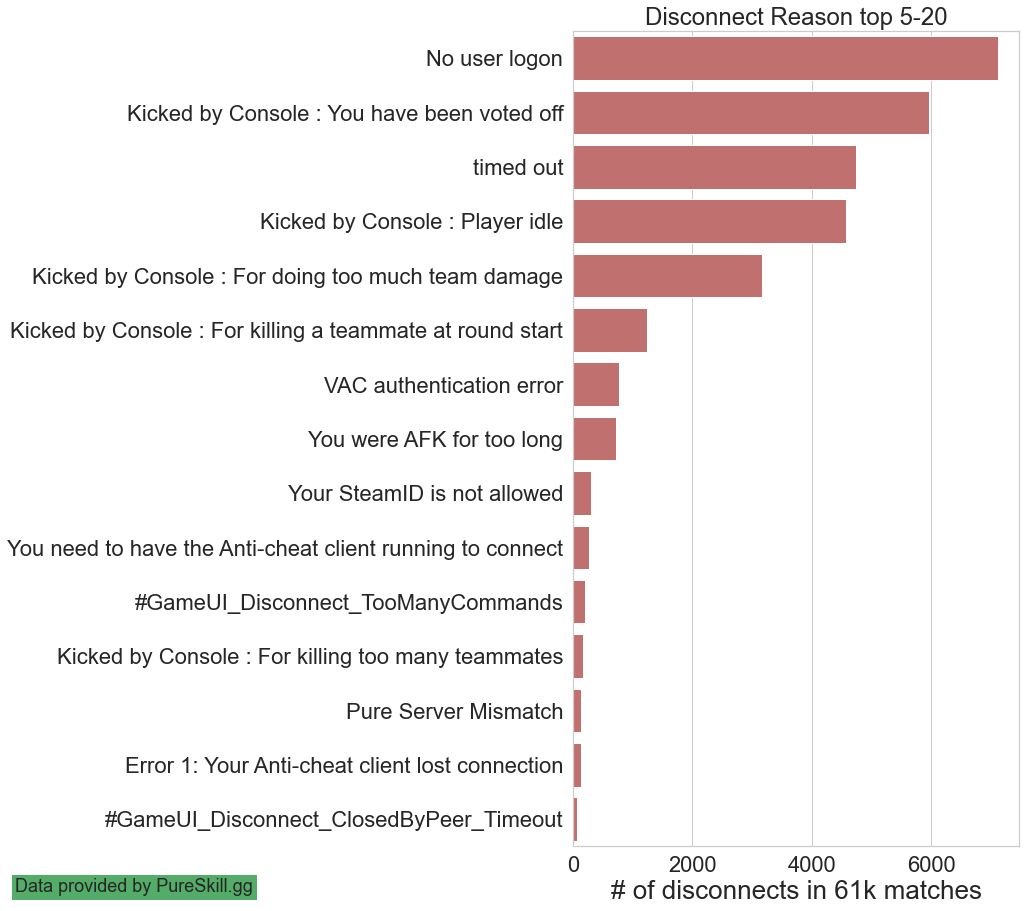

In [32]:
plt.rcParams["figure.figsize"] = (8,15)
sns.set(font_scale = 2)
sns.set_style('whitegrid')
ax = (
    sns.countplot(y="disconnect_reason", data=df,order=order[4:15+4], color=try_again_red)
)
ax.set_xlabel("# of disconnects in 61k matches", fontsize = 26)
ax.set_ylabel("", fontsize = 20)
ax.set(title='Disconnect Reason top 5-20')
ax.text(-1.25, -0.05, 'Data provided by PureSkill.gg', 
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes, fontsize = 18, bbox = dict(facecolor = button_green, alpha = 1))
## saving this way fails because 
## the figures are too wide for tight_layout or some nonsense...
fig = ax.get_figure()
fig.savefig("tmp/top_5-20.png") 

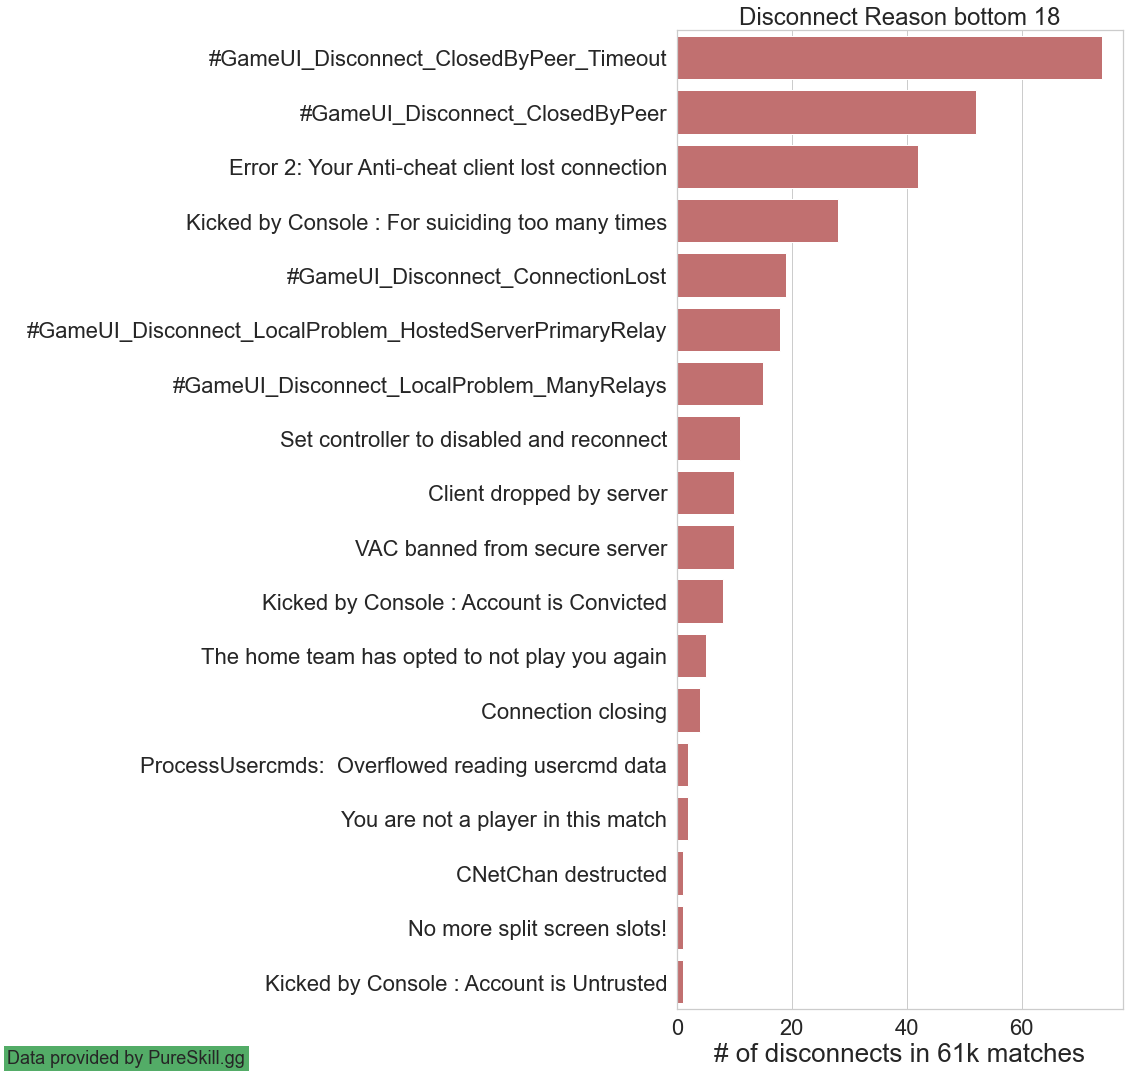

In [31]:
plt.rcParams["figure.figsize"] = (8,18)
sns.set(font_scale = 2)
sns.set_style('whitegrid')
ax = (
    sns.countplot(y="disconnect_reason", data=df,order=order[-18:], color=try_again_red)
)
ax.set_xlabel("# of disconnects in 61k matches", fontsize = 26)
ax.set_ylabel("", fontsize = 20)
ax.set(title='Disconnect Reason bottom 18')
ax.text(-1.5, -0.05, 'Data provided by PureSkill.gg', 
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes, fontsize = 18, bbox = dict(facecolor = button_green, alpha = 1))
## saving this way fails because 
## the figures are too wide for tight_layout or some nonsense...
fig = ax.get_figure()
fig.savefig("tmp/bottom_18.png") 

In [25]:
sum(df['disconnect_reason']=='VAC banned from secure server')/total_matches

0.00016269421622061337

In [26]:
print(round(100*sum(df['disconnect_reason']=='VAC banned from secure server')/total_matches,4),'percent of matches had a VAC ban')

0.0163 percent of matches had a VAC ban


In [27]:
len(set(df["disconnect_reason"]))

36